<a href="https://colab.research.google.com/github/riyhs/ml-rock-paper-scissors/blob/main/Submission_Dicoding_ML_Pemula_Riyaldi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Biodata**

Nama : Riyaldi Hasan Setiawan

E-mail : riyaldi.dev@gmail.com

Alamat : Kab. Sukoharjo, Prov. Jawa Tengah

Mengimport library-library yang dibutuhkan

In [ ]:
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Mendownload dataset rockpaperscissors.zip

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-30 16:14:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   855KB/s    in 5m 22s  

2021-05-30 16:19:34 (979 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Mengekstrak dataset yang telah didapatkan

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

melihat struktur data yang telah di ekstrak

In [ ]:
os.listdir(base_dir)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

Augmentasi gambar menggunakan ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='wrap',
                  validation_split=0.4)

Mempersiapkan data untuk dipelajari model

In [ ]:
train_generator = train_datagen.flow_from_directory(
                    base_dir,
                    target_size=(100,150),
                    shuffle=True,
                    subset='training')

validation_generator = train_datagen.flow_from_directory(
                    base_dir,
                    target_size=(100,150),
                    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membangun arsitektur CNN menggunakan model Sequential

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape = (100,150,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512,activation= 'relu'),
      tf.keras.layers.Dense(3, activation= 'softmax')
])

Memanggil fungsi ``` compile()``` untuk menentukan loss function dan optimizer



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Melatih model menggunakan metode ```fit()```

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 29s - loss: 1.0276 - accuracy: 0.5025 - val_loss: 0.7401 - val_accuracy: 0.7937
Epoch 2/20
25/25 - 28s - loss: 0.4645 - accuracy: 0.8288 - val_loss: 0.4684 - val_accuracy: 0.8313
Epoch 3/20
25/25 - 28s - loss: 0.2420 - accuracy: 0.9200 - val_loss: 0.2980 - val_accuracy: 0.8938
Epoch 4/20
25/25 - 28s - loss: 0.2827 - accuracy: 0.8938 - val_loss: 0.2329 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 28s - loss: 0.2083 - accuracy: 0.9337 - val_loss: 0.1515 - val_accuracy: 0.9563
Epoch 6/20
25/25 - 27s - loss: 0.1404 - accuracy: 0.9532 - val_loss: 0.1500 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 28s - loss: 0.1025 - accuracy: 0.9663 - val_loss: 0.1118 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 28s - loss: 0.1153 - accuracy: 0.9638 - val_loss: 0.2516 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 28s - loss: 0.1470 - accuracy: 0.9463 - val_loss: 0.1675 - val_accuracy: 0.9312
Epoch 10/20
25/25 - 27s - loss: 0.0859 - accuracy: 0.9688 - val_loss: 0.1290 - val_accuracy: 0.9500
Epoch 11/

Membuat Google Colab lebih interaktif dengan menambahkan fungsi tambah gambar untuk di prediksi

Saving 0OEXfEooCXlljaEl.png to 0OEXfEooCXlljaEl (2).png
0OEXfEooCXlljaEl.png
rock


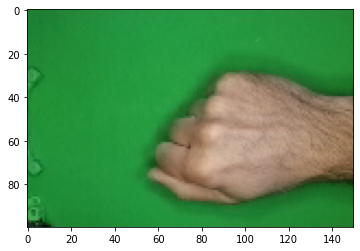

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax(classes)
  
  print(fn)
  if result==0:
    print('paper')
  elif result==1:
    print('rock')
  else:
    print('scissors')